In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
from scipy import stats

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)


from matplotlib.markers import TICKDOWN

In [2]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [3]:
# Import Data
p21_control_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p21_control_pred.xlsx", ["single_cell", "background"])
p21_control_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220630_MSC_dox\Data\220610_dox_p21_control_target.xlsx", ["single_cell", "background"])

p21_dox_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p21_dox_pred.xlsx", ["single_cell", "background"])
p21_dox_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_p21_dox_target.xlsx", ["single_cell", "background"])

# Standardize Data to Background
p21_control_pred["single_cell"].Mean = p21_control_pred["single_cell"].Mean - np.mean (p21_control_pred["background"].Mean)
p21_control_target["single_cell"].Mean = p21_control_target["single_cell"].Mean - np.mean (p21_control_target["background"].Mean)
p21_dox_pred["single_cell"].Mean = p21_dox_pred["single_cell"].Mean - np.mean (p21_dox_pred["background"].Mean)
p21_dox_target["single_cell"].Mean = p21_dox_target["single_cell"].Mean - np.mean (p21_dox_target["background"].Mean)

print (p21_control_target["single_cell"].Mean)

0     0.35808
1     0.26408
2     1.03408
3     0.60108
4     0.51508
5     0.51508
6     0.27608
7     0.39508
8     0.60208
9     0.53608
10    0.32508
11    0.71108
12    0.12108
13    1.29208
14    0.52708
15    0.31308
16    0.48608
17    0.24508
18    0.02308
19    0.13708
20    0.55408
21    0.02908
22    0.26308
23    0.46408
24    0.26808
25    0.11008
26    0.36408
27    0.72008
28    0.74308
29    0.30708
Name: Mean, dtype: float64


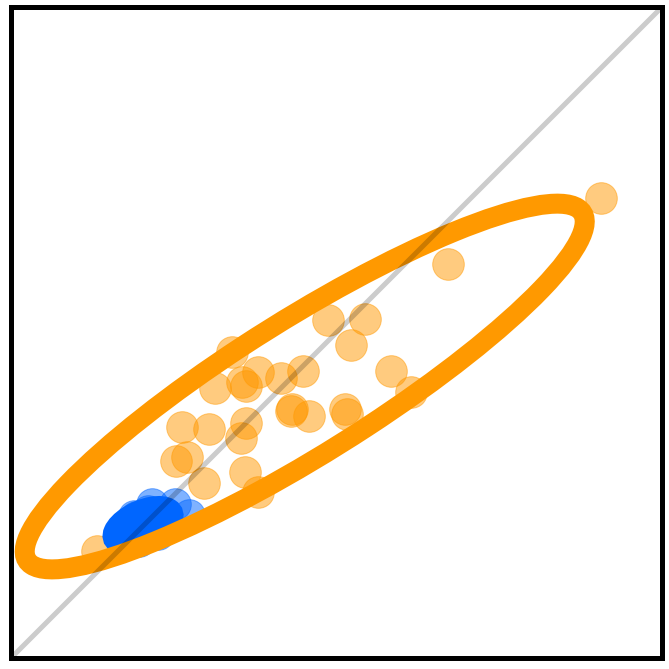

In [4]:
fig, axs = plt.subplots(figsize = [10,10])
axs.spines["top"].set_linewidth(5)
axs.spines["left"].set_linewidth(5)
axs.spines["right"].set_linewidth(5)
axs.spines["bottom"].set_linewidth(5)

plt.xlim(-2,10)
plt.ylim(-2,10)

# Plot f(x) = x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x, c = 'black', alpha = 0.2, linewidth = 5)

# Plot Scatter Plots
plt.scatter(p21_control_target["single_cell"].Mean, p21_control_pred["single_cell"].Mean, c = "#0066ff", alpha = 0.5, label = "Control", s=1000)
plt.scatter(p21_dox_target["single_cell"].Mean, p21_dox_pred["single_cell"].Mean, c = "#ff9900", alpha = 0.5, label = "Dox", s=1000)

# Plot Circles
confidence_ellipse (p21_control_target["single_cell"].Mean, p21_control_pred["single_cell"].Mean, ax = axs, n_std = 2.0, edgecolor = "#0066ff", linewidth=20)
confidence_ellipse (p21_dox_target["single_cell"].Mean, p21_dox_pred["single_cell"].Mean, ax = axs, n_std = 2.0, edgecolor = "#ff9900", linewidth=20)

# Plot Titles
# plt.title ("p21")
# plt.xlabel ("Target Intensity", fontsize = 'small')
# plt.ylabel ("Prediction Intensity", fontsize = 'small')
# plt.legend()

axs.axes.xaxis.set_visible(False)
axs.axes.yaxis.set_visible(False)

# plt.legend(frameon=False, loc='upper center', ncol = 5, fontsize = 'x-small', labelspacing = 0, handlelength = 1.5, handletextpad = 0, borderpad = 0, columnspacing = 0)

plt.tight_layout()
plt.savefig(fname="p21")

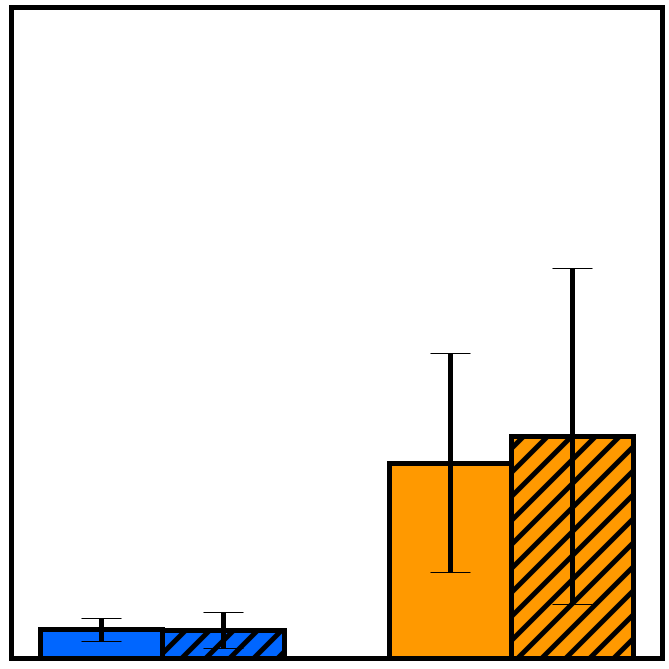

In [5]:
# Constants
indexes = np.arange(2)
bar_width = 0.35

# Create Subplot
fix, ax = plt.subplots(figsize = [10,10])

plt.ylim(0,10)

ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

plt.rcParams['hatch.linewidth'] = 5


# Plot Barplot
error_config = dict(elinewidth = 5, ecolor = '0', capsize = 20)
ax.bar(0, p21_control_pred["single_cell"].Mean.mean(), bar_width, yerr = p21_control_pred["single_cell"].Mean.std(), error_kw = error_config, color = "#0066ff", edgecolor = "black", linewidth = 5)
ax.bar(bar_width, p21_control_target["single_cell"].Mean.mean(), bar_width, yerr = p21_control_target["single_cell"].Mean.std(), error_kw = error_config, color = "#0066ff", hatch = "/", edgecolor = "white", linewidth = 5)
ax.bar(bar_width, p21_control_target["single_cell"].Mean.mean(), bar_width, yerr = p21_control_target["single_cell"].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

ax.bar(1, p21_dox_pred["single_cell"].Mean.mean(), bar_width, yerr = p21_dox_pred["single_cell"].Mean.std(), error_kw = error_config, color = "#ff9900", edgecolor = "black", linewidth = 5)
ax.bar(1+bar_width, p21_dox_target["single_cell"].Mean.mean(), bar_width, yerr = p21_dox_target["single_cell"].Mean.std(), error_kw = error_config, color = "#ff9900", hatch = "/", edgecolor = "white", linewidth = 5)
ax.bar(1+bar_width, p21_dox_target["single_cell"].Mean.mean(), bar_width, yerr = p21_dox_target["single_cell"].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

# Plot Titles
# ax.set_title("p21")
# ax.set_ylabel("Mean Intensity")
ax.set_xticks(indexes + bar_width / 2)
# ax.set_xticklabels(["Control", "Dox"])

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


# prediction_label = mpatches.Patch(facecolor='#0096ff', label='Prediction')
# target_label = mpatches.Patch(facecolor='#0096ff', hatch = "/", label='Target')
# plt.legend(handles=[prediction_label, target_label], frameon=False, loc='upper left', fontsize = 'xx-small', borderpad = 0)

plt.tight_layout()
plt.savefig(fname="p21_bar")

In [6]:
stats.ttest_ind (p21_control_pred["single_cell"].Mean, p21_dox_pred["single_cell"].Mean)

Ttest_indResult(statistic=-8.288164178768564, pvalue=2.017789909472901e-11)

In [7]:
stats.ttest_ind (p21_control_target["single_cell"].Mean, p21_dox_target["single_cell"].Mean)

Ttest_indResult(statistic=-6.288927701060268, pvalue=4.529836933040697e-08)